In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe
import os

In [2]:
USER = os.environ['USER']
path = f'/glade/scratch/{USER}/DPLE-results'
filename = f'{path}/DPLE-FOSI_hindcast_T_S_O2_1948-2017_monthly.nc'
dset = xr.open_dataset(filename)
oxy = dset['O2'].isel(time=range(672,826),z_t=range(35))

In [3]:
path1 = '/glade/campaign/cesm/collections/CESM1-DPLE/DPLE-FOSI/rerun_with_extension/timeseries'
filename = f'{path1}/g.DPLE.GECOIAF.T62_g16.009.chey.pop.h.RHO.024901-031812.nc'
dses = xr.open_dataset(filename)
rho = dses['RHO'].isel(time=range(672,826),z_t=range(35))

In [4]:
oxy2 = oxy/rho

In [5]:
ds = xr.Dataset()
ds['O2'] = oxy2#,nlat=range(240,380),nlon=range(125,320))
ds = ds.rename({"TLONG": "lon", "TLAT": "lat"})
ds = ds.drop(['ULAT','ULONG'])
#ds = ds.assign_coords(lon=(((ds.lon + 180) % 360) - 180))
ds

<xarray.Dataset>
Dimensions:  (z_t: 35, nlat: 384, nlon: 320, time: 154)
Coordinates:
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.277e+04 5.794e+04
    lat      (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    lon      (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 318.9 319.4 319.8
  * time     (time) object 0305-02-01 00:00:00 ... 0317-11-01 00:00:00
Dimensions without coordinates: nlat, nlon
Data variables:
    O2       (time, z_t, nlat, nlon) float32 nan nan nan nan ... nan nan nan nan

Text(0, 0.5, 'lat')

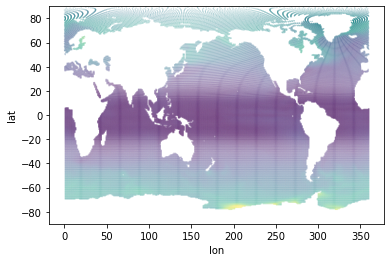

In [6]:
plt.scatter(ds['lon'], ds['lat'], c=ds['O2'][0,0], s=0.01)  # plot grid locations
plt.ylim([-90, 90])
plt.xlabel("lon")
plt.ylabel("lat")

In [7]:
ds_out = xe.util.grid_global(1, 1)
ds_out  # contains lat/lon values of cell centers and boundaries.

<xarray.Dataset>
Dimensions:  (y: 180, x: 360, y_b: 181, x_b: 361)
Coordinates:
    lon      (y, x) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    lat      (y, x) float64 -89.5 -89.5 -89.5 -89.5 ... 89.5 89.5 89.5 89.5
    lon_b    (y_b, x_b) int64 -180 -179 -178 -177 -176 ... 176 177 178 179 180
    lat_b    (y_b, x_b) int64 -90 -90 -90 -90 -90 -90 -90 ... 90 90 90 90 90 90
Dimensions without coordinates: y, x, y_b, x_b
Data variables:
    *empty*

In [8]:
lon=np.arange(0.5,360,1)
lat=np.arange(0.5,80,1)
lon_b=np.arange(0,360.5,1)
lat_b=np.arange(0,80.5,1)
lon,lat = np.meshgrid(lon,lat)
lon_b,lat_b = np.meshgrid(lon_b,lat_b)
ds_out = ds_out.assign_coords(lon=(('y','x'),lon),lat=(('y','x'),lat),lon_b=(('y_b','x_b'),lon_b),lat_b=(('y_b','x_b'),lat_b))
ds_out

<xarray.Dataset>
Dimensions:  (y: 80, x: 360, y_b: 81, x_b: 361)
Coordinates:
    lon      (y, x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lat      (y, x) float64 0.5 0.5 0.5 0.5 0.5 0.5 ... 79.5 79.5 79.5 79.5 79.5
    lon_b    (y_b, x_b) float64 0.0 1.0 2.0 3.0 4.0 ... 357.0 358.0 359.0 360.0
    lat_b    (y_b, x_b) float64 0.0 0.0 0.0 0.0 0.0 ... 80.0 80.0 80.0 80.0 80.0
Dimensions without coordinates: y, x, y_b, x_b
Data variables:
    *empty*

In [9]:
regridder = xe.Regridder(ds, ds_out, "bilinear")
dr_out = regridder(ds['O2'])
dr_out

<xarray.DataArray (time: 154, z_t: 35, y: 80, x: 360)>
array([[[[ 1.9994385e+02,  1.9997124e+02,  2.0008412e+02, ...,
           2.0031715e+02,  2.0013412e+02,  1.9999942e+02],
         [ 1.9888644e+02,  1.9877287e+02,  1.9876042e+02, ...,
           1.9962146e+02,  1.9933600e+02,  1.9907088e+02],
         [ 1.9813997e+02,  1.9797498e+02,  1.9787260e+02, ...,
           1.9878053e+02,  1.9857117e+02,  1.9834851e+02],
         ...,
         [ 3.4437024e+02,  3.4591241e+02,  3.4654269e+02, ...,
           3.3876071e+02,  3.4084903e+02,  3.4292346e+02],
         [ 3.3902173e+02,  3.4099023e+02,  3.4295911e+02, ...,
           3.3348859e+02,  3.3521417e+02,  3.3714200e+02],
         [ 3.3234116e+02,  3.3353223e+02,  3.3492029e+02, ...,
           3.2936584e+02,  3.3011368e+02,  3.3123990e+02]],

        [[ 1.9994478e+02,  1.9997594e+02,  2.0009061e+02, ...,
           2.0030841e+02,  2.0012605e+02,  1.9999500e+02],
         [ 1.9891824e+02,  1.9879724e+02,  1.9877817e+02, ...,
           1.9966930e+02,  1.9937300e+02,  1.9910573e+02],
         [ 1.9819067e+02,  1.9802008e+02,  1.9791266e+02, ...,
           1.9884544e+02,  1.9863379e+02,  1.9840588e+02],
...
           2.9123160e+02,  2.9142331e+02,  2.9164832e+02],
         [ 2.9126169e+02,  2.9149380e+02,  2.9170871e+02, ...,
           2.9084192e+02,  2.9100336e+02,  2.9113989e+02],
         [ 2.8883435e+02,  2.8902820e+02,  2.8915823e+02, ...,
           2.8812277e+02,  2.8838318e+02,  2.8861133e+02]],

        [[-1.2207201e+00, -1.3087995e+00, -1.3689524e+00, ...,
          -8.2811594e-01, -9.7433263e-01, -1.1083040e+00],
         [-1.4853466e+00, -1.5113447e+00, -1.4959221e+00, ...,
          -1.1422068e+00, -1.3011636e+00, -1.4163821e+00],
         [-1.8513938e+00, -1.7987288e+00, -1.6281453e+00, ...,
          -1.3773124e+00, -1.6050531e+00, -1.7777579e+00],
         ...,
         [ 2.9269394e+02,  2.9319711e+02,  2.9374667e+02, ...,
           2.9167899e+02,  2.9192520e+02,  2.9220157e+02],
         [ 2.9154065e+02,  2.9181723e+02,  2.9207947e+02, ...,
           2.9096454e+02,  2.9116876e+02,  2.9136163e+02],
         [ 2.8909711e+02,  2.8931219e+02,  2.8947424e+02, ...,
           2.8836972e+02,  2.8860938e+02,  2.8885648e+02]]]],
      dtype=float32)
Coordinates:
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.277e+04 5.794e+04
  * time     (time) object 0305-02-01 00:00:00 ... 0317-11-01 00:00:00
    lat      (y, x) float64 0.5 0.5 0.5 0.5 0.5 0.5 ... 79.5 79.5 79.5 79.5 79.5
    lon      (y, x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: y, x
Attributes:
    regrid_method:  bilinear

In [10]:
dsf = xr.Dataset()
dsf['O2'] = dr_out

In [11]:
dsf.load()

<xarray.Dataset>
Dimensions:  (z_t: 35, time: 154, y: 80, x: 360)
Coordinates:
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.277e+04 5.794e+04
  * time     (time) object 0305-02-01 00:00:00 ... 0317-11-01 00:00:00
    lat      (y, x) float64 0.5 0.5 0.5 0.5 0.5 0.5 ... 79.5 79.5 79.5 79.5 79.5
    lon      (y, x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: y, x
Data variables:
    O2       (time, z_t, y, x) float32 199.9 200.0 200.1 ... 288.4 288.6 288.9

In [12]:
dsf.to_netcdf(f'{path}/FOSI_hindcast_O2_hori_regrid_200401-201510_monthly2.nc', mode='w')

## plot

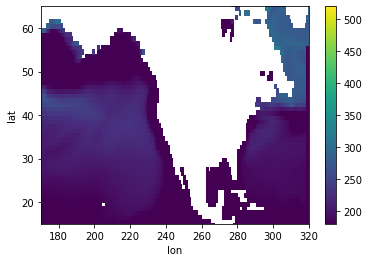

In [13]:
plt.pcolor(dsf['lon'], dsf['lat'], dsf['O2'][0,14], shading='nearest', vmin=180, vmax=520)#, s=0.05)  # plot grid locations
plt.ylim([15, 65])
plt.xlim([170,320])
plt.xlabel("lon")
plt.ylabel("lat")
plt.colorbar()

/glade/u/home/czhuomin/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  """Entry point for launching an IPython kernel.


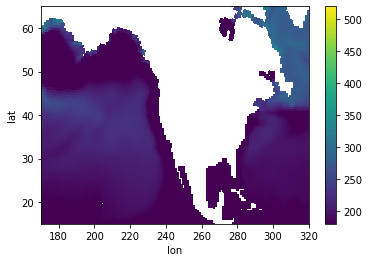

In [14]:
plt.pcolor(ds['lon'][240:380,125:320], ds['lat'][240:380,125:320], ds['O2'][0,14,240:380,125:320], shading='nearest', vmin=180, vmax=520)#, s=0.05)  # plot grid locations
plt.ylim([15, 65])
plt.xlim([170,320])
plt.xlabel("lon")
plt.ylabel("lat")
plt.colorbar()

## also regrid the LME mask

In [12]:
datadir = f'/glade/u/home/{USER}/O2prediction/Prediction/notebooks/data'
filename = '%s/LME-mask-POP_gx1v6.nc' % datadir
ds1 = xr.open_dataset(filename)
ds1
#lme_mask = ds1['lme_mask']
#tlon = ds1['TLONG'].values - 360.
#tlat = ds1['TLAT'].values
#lme = [1,2,3,4,5,6,7,8,9,10,65]

<xarray.Dataset>
Dimensions:   (nlat: 384, nlon: 320)
Coordinates:
    TLONG     (nlat, nlon) float64 ...
    TLAT      (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    lme_mask  (nlat, nlon) float64 ...
    KMT       (nlat, nlon) int32 ...
    TAREA     (nlat, nlon) float64 ...
Attributes:
    regrid_method:  nearest_s2d

In [13]:
ds1 = ds1.rename({"TLONG": "lon", "TLAT": "lat"})
ds1 = ds1.drop(['KMT','TAREA'])
ds1

<xarray.Dataset>
Dimensions:   (nlat: 384, nlon: 320)
Coordinates:
    lon       (nlat, nlon) float64 ...
    lat       (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    lme_mask  (nlat, nlon) float64 ...
Attributes:
    regrid_method:  nearest_s2d

In [15]:
ds1['lme_mask'][:20,:20]

<xarray.DataArray 'lme_mask' (nlat: 20, nlon: 20)>
array([[61., 61., 61., ..., nan, nan, nan],
       [61., 61., 61., ..., nan, nan, nan],
       [61., 61., 61., ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    lon      (nlat, nlon) float64 ...
    lat      (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:  LME mask

In [16]:
regridder = xe.Regridder(ds1, ds_out, "bilinear")
dr_out = regridder(ds1['lme_mask'])
dr_out

<xarray.DataArray (y: 80, x: 360)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan, 28.       , ..., 28.       , 28.       ,
        28.       ],
       ...,
       [19.       , 19.       , 19.       , ..., 19.       , 19.       ,
        19.       ],
       [19.       , 19.       , 19.       , ..., 19.       , 19.       ,
        19.       ],
       [19.       , 19.1106081, 19.438681 , ..., 19.       , 19.       ,
        19.       ]])
Coordinates:
    lat      (y, x) float64 0.5 0.5 0.5 0.5 0.5 0.5 ... 79.5 79.5 79.5 79.5 79.5
    lon      (y, x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: y, x
Attributes:
    regrid_method:  bilinear

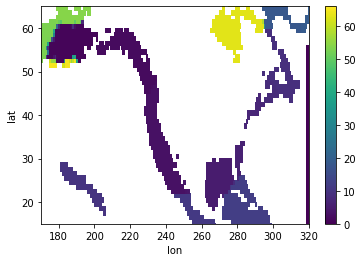

In [21]:
plt.pcolor(ds_out['lon'], ds_out['lat'], dr_out, shading='nearest')#, s=0.05)  # plot grid locations
plt.ylim([15, 65])
plt.xlim([170,320])
plt.xlabel("lon")
plt.ylabel("lat")
plt.colorbar()

In [23]:
dsf = xr.Dataset()
dsf['lme_mask'] = dr_out

In [24]:
dsf.load()

<xarray.Dataset>
Dimensions:   (y: 80, x: 360)
Coordinates:
    lat       (y, x) float64 0.5 0.5 0.5 0.5 0.5 ... 79.5 79.5 79.5 79.5 79.5
    lon       (y, x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: y, x
Data variables:
    lme_mask  (y, x) float64 nan nan nan nan nan ... 19.0 19.0 19.0 19.0 19.0

In [25]:
dsf.to_netcdf(f'{path}/FOSI_hindcast_LME_hori_regrid.nc', mode='w')